# Panoramer 3000 tester :)

In [1]:
import numpy as np
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import panoramer as pano

# Steps to Merge Images
## $I$. Preprocessing
    - Resize images to the same scale if needed.
    - Normalize brightness/contrast across images to ensure consistency.

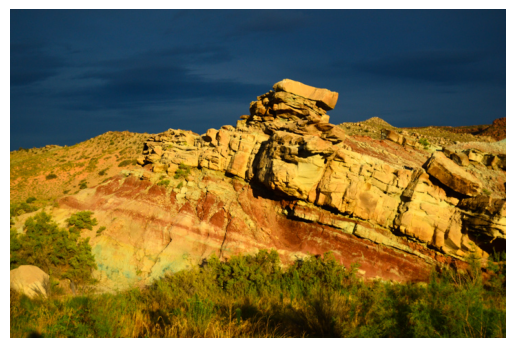

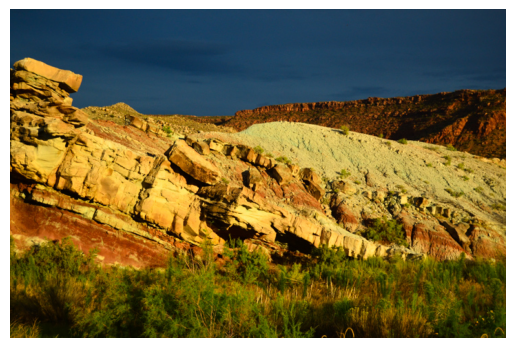

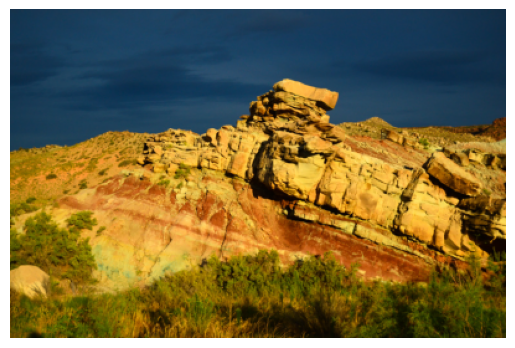

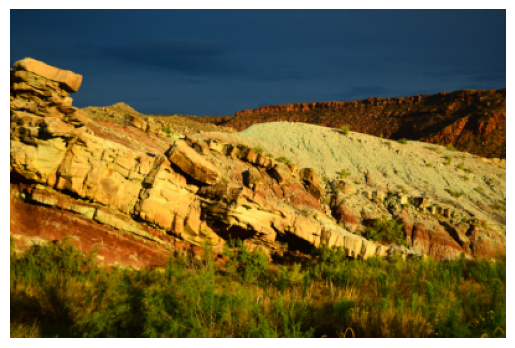

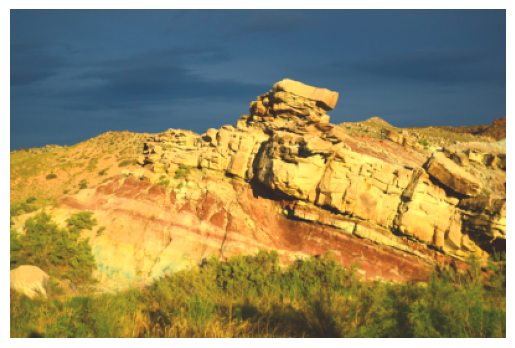

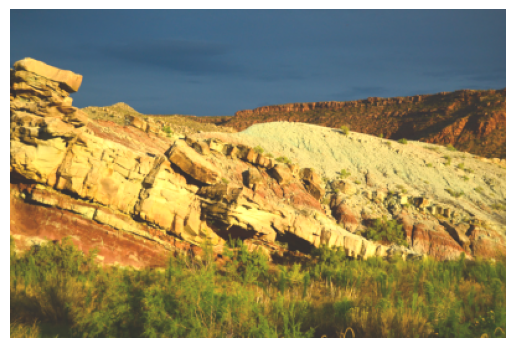

In [13]:
image1_path = "./images/H/H1.jpg"
image2_path = "./images/H/H2.jpg"

image1 = pano.load_image(image1_path)
image2 = pano.load_image(image2_path)

pano.show_image_jupyter(image1)
pano.show_image_jupyter(image2)

resized_image1 = pano.resize_image(image1, width=400, height=None)
resized_image2 = pano.resize_image(image2, width=400, height=None)

pano.show_image_jupyter(resized_image1)
pano.show_image_jupyter(resized_image2)

normalized_image1 = pano.normalize_brightness_contrast(resized_image1)
normalized_image2 = pano.normalize_brightness_contrast(resized_image2)
pano.show_image_jupyter(normalized_image1)
pano.show_image_jupyter(normalized_image2)

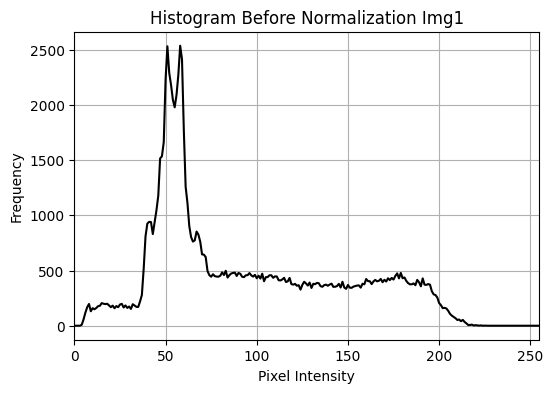

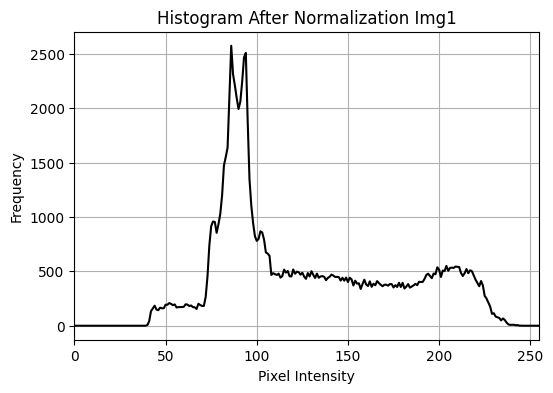

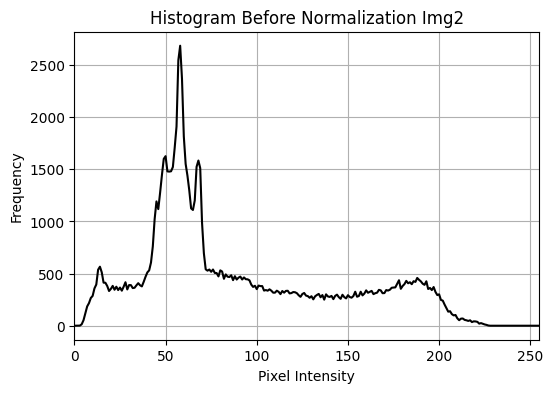

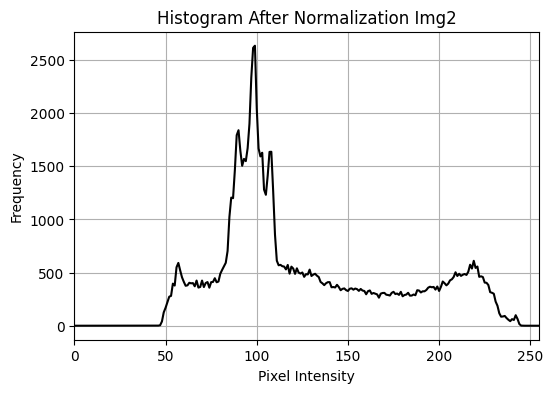

In [4]:
pano.plot_brightness_histogram(resized_image1, "Histogram Before Normalization Img1")
pano.plot_brightness_histogram(normalized_image1, "Histogram After Normalization Img1")

pano.plot_brightness_histogram(resized_image2, "Histogram Before Normalization Img2")
pano.plot_brightness_histogram(normalized_image2, "Histogram After Normalization Img2")

## $II$. Feature Detection & Matching
    - Detect features in images using methods like ORB, SIFT, or SURF.
    - Match corresponding features between images to find points of alignment.

In [5]:
keypoints1 = pano.detect_features(normalized_image1, method=None)
keypoints2 = pano.detect_features(normalized_image2, method=None)

# keypoints1 = pano.detect_features(normalized_image1, method='ORB')
# keypoints2 = pano.detect_features(normalized_image2, method='ORB')

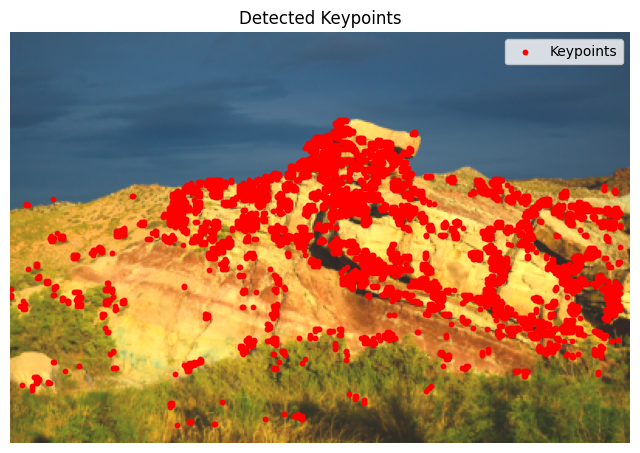

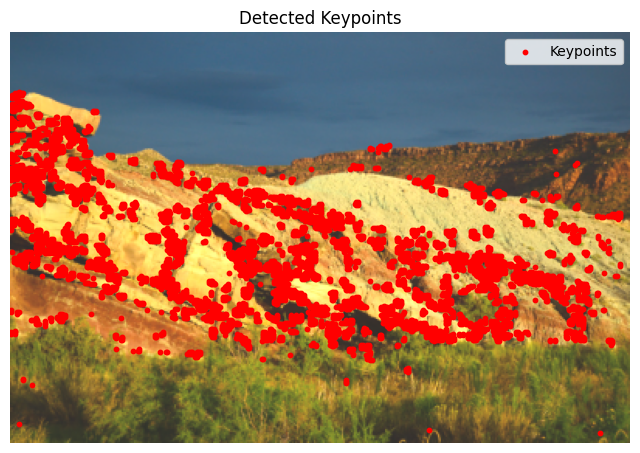

In [6]:
pano.visualize_keypoints_jupyter(normalized_image1, keypoints1)
pano.visualize_keypoints_jupyter(normalized_image2, keypoints2)

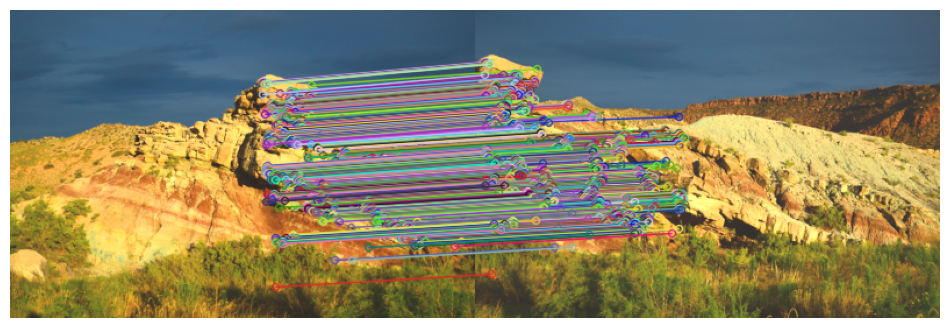

In [7]:
descriptors1 = pano.compute_descriptors(normalized_image1, keypoints1, method=None)
descriptors2 = pano.compute_descriptors(normalized_image2, keypoints2, method=None)

# descriptors1 = pano.compute_descriptors(normalized_image1, keypoints1, method='ORB')
# descriptors2 = pano.compute_descriptors(normalized_image2, keypoints2, method='ORB')

matches = pano.match_features(descriptors1, descriptors2, method="BF")
assert len(matches) > 0, "No matches found!"

matches_custom = pano.match_features(descriptors1, descriptors2, method=None)
assert len(matches_custom) > 0, "No custom matches found!"

pano.visualize_matches(normalized_image1, normalized_image2, keypoints1, keypoints2, matches_custom)

## $III$. Homography Estimation
    - Compute a homography matrix using matched points to align images correctly.

In [10]:
matched_pts1 = np.array([keypoints1[c1] for c1, c2 in matches_custom])
matched_pts2 = np.array([keypoints2[c2] for c1, c2 in matches_custom])

H = pano.find_homography(matched_pts1, matched_pts2) # Custom RANSAC
H_ = pano.find_homography(matched_pts1, matched_pts2, method='RANSAC')
H__ = pano.find_homography(matched_pts1, matched_pts2, method='LMEDS')
H___ = pano.find_homography(matched_pts1, matched_pts2, method='RHO')

assert H is not None, "Homography estimation failed!"
print("\nEstimated Homography Matrix (custom RANSAC):\n", H)

assert H_ is not None, "Homography (built-in 1) estimation failed!"
print("\nEstimated Homography Matrix (built-in RANSAC):\n", H_)

assert H__ is not None, "Homography (built-in 2) estimation failed!"
print("\nEstimated Homography Matrix (built-in LMEDS):\n", H__)

assert H___ is not None, "Homography (built-in 3) estimation failed!"
print("\nEstimated Homography Matrix (built-in RHO):\n", H___)

print("\nAvg Error in custom computation:\n", abs(H - H_).mean())


Estimated Homography Matrix (custom RANSAC):
 [[ 1.21087353e+00 -3.60170339e-02 -2.51603513e+02]
 [ 1.04079886e-01  1.16393858e+00 -4.50559359e+01]
 [ 5.16057150e-04  3.09494944e-05  1.00000000e+00]]

Estimated Homography Matrix (built-in RANSAC):
 [[ 1.20916481e+00 -3.60696386e-02 -2.51211859e+02]
 [ 1.03626013e-01  1.16241598e+00 -4.48781952e+01]
 [ 5.12514912e-04  2.92225826e-05  1.00000000e+00]]

Estimated Homography Matrix (built-in LMEDS):
 [[ 1.20628524e+00 -3.52625864e-02 -2.50687499e+02]
 [ 1.02745420e-01  1.16026256e+00 -4.45925990e+01]
 [ 5.06840086e-04  2.64762130e-05  1.00000000e+00]]

Estimated Homography Matrix (built-in RHO):
 [[ 1.22346675e+00 -3.61201204e-02 -2.54218933e+02]
 [ 1.05905317e-01  1.18373942e+00 -4.64386635e+01]
 [ 5.29981626e-04  1.13115588e-04  1.00000000e+00]]

Avg Error in custom computation:
 0.06368199489226885


## $IV$. Image Warping
    - Warp images using the homography matrix to align them in the same coordinate system.

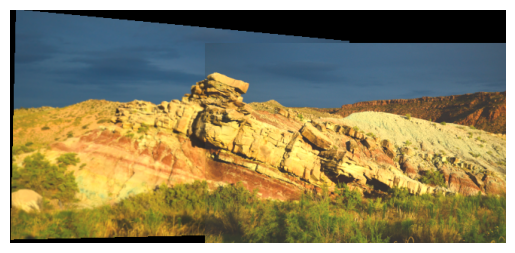

In [8]:
img = pano.warp_image(H, normalized_image2, normalized_image1)
pano.show_image_jupyter(img)

## $V$. Image Stitching
    - Combine the warped images into a single panorama.

Found 6694 keypoints in previous image
Found 4607 keypoints in current image
Computed 6694 for previous image
Computed 4607 for current image
Found 36 matches
Found 3625 keypoints in previous image
Found 4607 keypoints in current image
Computed 3625 for previous image
Computed 4607 for current image
Found 127 matches
Found 2711 keypoints in previous image
Found 1804 keypoints in current image
Computed 2711 for previous image
Computed 1804 for current image
Found 6 matches


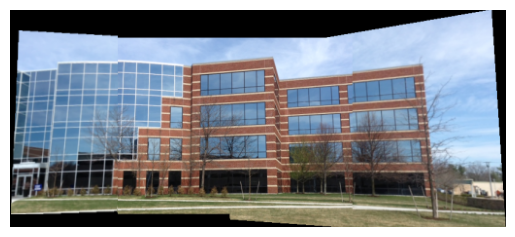

In [ ]:
import panoramer as pano

image1_path = "./images/B/B3.jpg"
image2_path = "./images/B/B4.jpg"
image3_path = "./images/B/B5.jpg"

images = [pano.load_image(image1_path), pano.load_image(image2_path)]
res1 = pano.stitch_images(images[0], images[1])

images2 = [pano.load_image(image3_path), pano.load_image(image2_path)]
res2 = pano.stitch_images(images2[0], images2[1])

images3 = [res1, res2]
res = pano.stitch_images(images3[0], images3[1])

pano.show_image_jupyter(res)

Found 5931 keypoints in previous image
Found 6782 keypoints in current image
Computed 5931 for previous image
Computed 6782 for current image
Found 1150 matches
Found 4555 keypoints in previous image
Found 6782 keypoints in current image
Computed 4555 for previous image
Computed 6782 for current image
Found 741 matches
Found 3988 keypoints in previous image
Found 3828 keypoints in current image
Computed 3988 for previous image
Computed 3828 for current image
Found 1487 matches


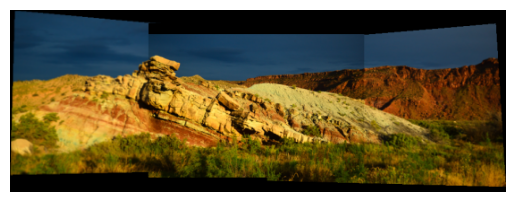

In [ ]:
import panoramer as pano

image1_path = "./images/H/H1.jpg"
image2_path = "./images/H/H2.jpg"
image3_path = "./images/H/H3.jpg"

images = [pano.load_image(image1_path), pano.load_image(image2_path)]
res1 = pano.stitch_images(images[0], images[1])

images2 = [pano.load_image(image3_path), pano.load_image(image2_path)]
res2 = pano.stitch_images(images2[0], images2[1])

images3 = [res1, res2]
res = pano.stitch_images(images3[0], images3[1])

pano.show_image_jupyter(res)

Found 1499 keypoints in previous image
Found 3028 keypoints in current image
Computed 1499 for previous image
Computed 3028 for current image
Found 15 matches
Found 3913 keypoints in previous image
Found 3028 keypoints in current image
Computed 3913 for previous image
Computed 3028 for current image
Found 49 matches
Found 720 keypoints in previous image
Found 1341 keypoints in current image
Computed 720 for previous image
Computed 1341 for current image
Found 307 matches


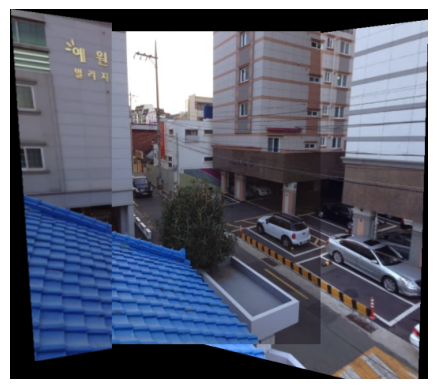

In [ ]:
import panoramer as pano

image1_path = "./images/R/R1.jpg"
image2_path = "./images/R/R2.jpg"
image3_path = "./images/R/R3.jpg"

images = [pano.load_image(image1_path), pano.load_image(image2_path)]
res1 = pano.stitch_images(images[0], images[1])

images2 = [pano.load_image(image3_path), pano.load_image(image2_path)]
res2 = pano.stitch_images(images2[0], images2[1])

images3 = [res1, res2]
res = pano.stitch_images(images3[0], images3[1], built_in_warper=False)

pano.show_image_jupyter(res)

Found 2998 keypoints in previous image
Found 2893 keypoints in current image
Computed 2998 for previous image
Computed 2893 for current image
Found 204 matches


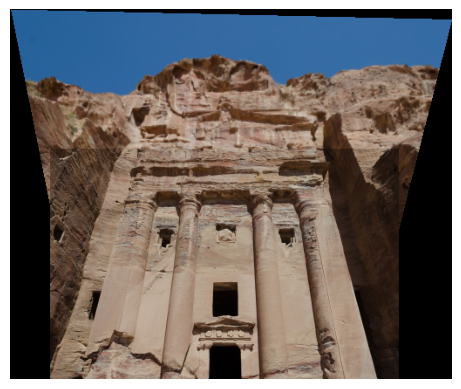

In [ ]:
import panoramer as pano

image1_path = "./images/T/T1.jpg"
image2_path = "./images/T/T2.jpg"
images = [pano.load_image(image1_path), pano.load_image(image2_path)]
res1 = pano.stitch_images(images[0], images[1])
pano.show_image_jupyter(res1)

Found 1988 keypoints in previous image
Found 1858 keypoints in current image
Computed 1988 for previous image
Computed 1858 for current image
Found 93 matches
Found 2458 keypoints in previous image
Found 1858 keypoints in current image
Computed 2458 for previous image
Computed 1858 for current image
Found 82 matches
Found 1102 keypoints in previous image
Found 1342 keypoints in current image
Computed 1102 for previous image
Computed 1342 for current image
Found 94 matches


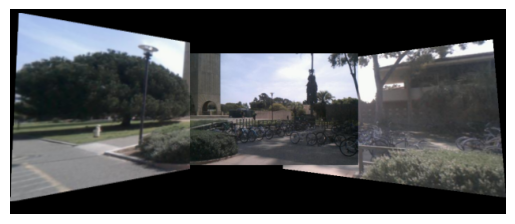

In [ ]:
import panoramer as pano

image1_path = "./images/P/P01.jpg"
image2_path = "./images/P/P02.jpg"
image3_path = "./images/P/P03.jpg"

images = [pano.load_image(image1_path), pano.load_image(image2_path)]
res1 = pano.stitch_images(images[0], images[1])

images2 = [pano.load_image(image3_path), pano.load_image(image2_path)]
res2 = pano.stitch_images(images2[0], images2[1])

images3 = [res1, res2]
res = pano.stitch_images(images3[0], images3[1], built_in_warper=False)

pano.show_image_jupyter(res)